In [1]:

from airsenal.framework.utils import *
from airsenal.framework.bpl_interface import get_fitted_team_model
from airsenal.framework.season import get_current_season, CURRENT_TEAMS

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

%matplotlib inline

In [2]:
model_team = get_fitted_team_model(get_current_season(), NEXT_GAMEWEEK, session)

Fitting team model...


In [3]:
# extract indices of current premier league teams
# val-1 because 1-indexed in model but 0-indexed in python
current_idx = {key: val-1 for key, val in model_team.team_indices.items()
               if key in CURRENT_TEAMS}

top6 = ['MCI', 'LIV', 'TOT', 'CHE', 'MUN', 'ARS']

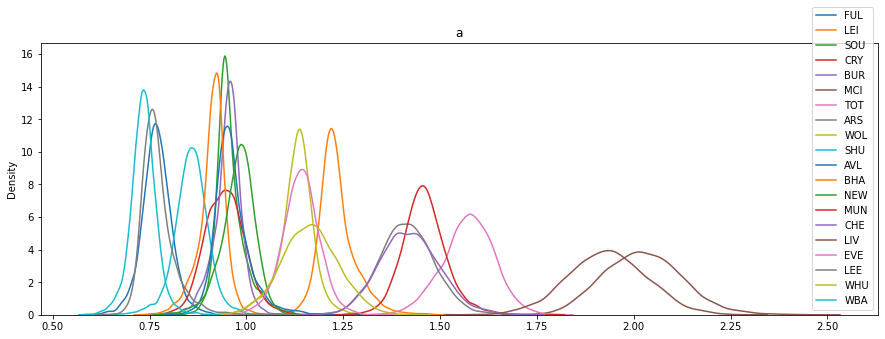

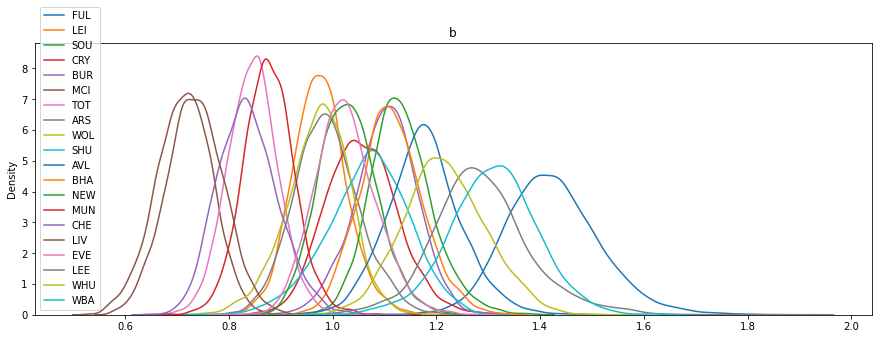

In [27]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in current_idx.items():
    sns.kdeplot(model_team.a[:, idx], label=team)
plt.title('a')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in current_idx.items():
    sns.kdeplot(model_team.b[:, idx], label=team)
plt.title('b')
plt.legend()

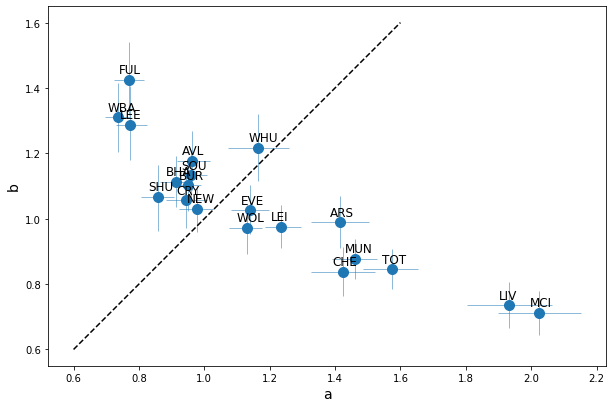

In [5]:
a_mean = model_team.a.mean(axis=0)
b_mean = model_team.b.mean(axis=0)

a_conf95 = np.abs(np.quantile(model_team.a,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(model_team.b, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(model_team.a,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(model_team.b, [0.1, 0.9], axis=0) - b_mean)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(aspect='equal')
plt.errorbar(a_mean[list(current_idx.values())],
             b_mean[list(current_idx.values())],
             xerr=a_conf80[:, list(current_idx.values())],
             yerr=b_conf80[:, list(current_idx.values())],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('a', fontsize=14)
plt.ylabel('b', fontsize=14)

for team, idx in current_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)
    
plt.plot([0.6,  1.6], [0.6, 1.6], "k--")


Text(0.5, 1.0, 'beta_b')

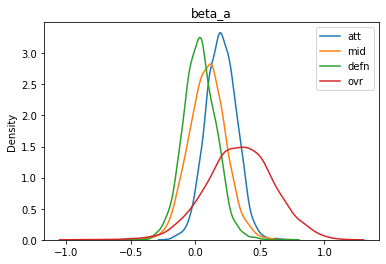

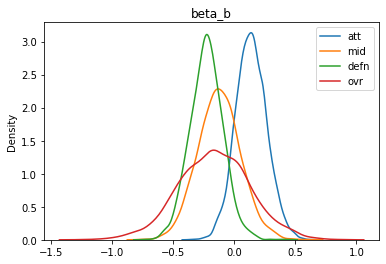

In [32]:
# team features (excluding first column which is team name)
feats = model_team.X.columns[1:]

for idx in range(model_team.beta_a.shape[1]):
    sns.kdeplot(model_team.beta_a[:,idx], 
                label=feats[idx])

plt.legend()
plt.title('beta_a')

plt.figure()
for idx in range(model_team.beta_b.shape[1]):
    sns.kdeplot(model_team.beta_b[:,idx],
                label=feats[idx])
plt.legend()
plt.title('beta_b')

(-0.5726374699674622, 0.34157521721940026)

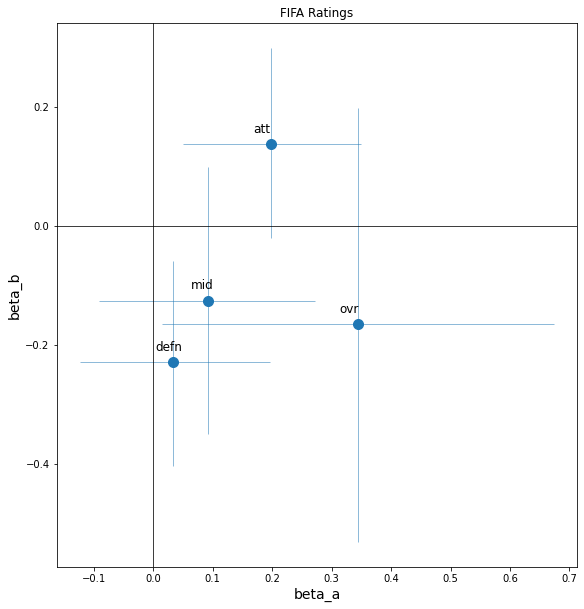

In [7]:
beta_a_mean = model_team.beta_a.mean(axis=0)
beta_b_mean = model_team.beta_b.mean(axis=0)

beta_a_conf95 = np.abs(np.quantile(model_team.beta_a,[0.025, 0.975], axis=0) - beta_a_mean)
beta_b_conf95 = np.abs(np.quantile(model_team.beta_b, [0.025, 0.975], axis=0) - beta_b_mean)
beta_a_conf80 = np.abs(np.quantile(model_team.beta_a,[0.1, 0.9], axis=0) - beta_a_mean)
beta_b_conf80 = np.abs(np.quantile(model_team.beta_b, [0.1, 0.9], axis=0) - beta_b_mean)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(aspect='equal')
plt.errorbar(beta_a_mean,
             beta_b_mean,
             xerr=beta_a_conf80,
             yerr=beta_b_conf80,
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('beta_a', fontsize=14)
plt.ylabel('beta_b', fontsize=14)
plt.title('FIFA Ratings')

for idx, feat in enumerate(feats):
    ax.annotate(feat,
                (beta_a_mean[idx]-0.03, beta_b_mean[idx]+0.02), 
                fontsize=12)
    
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.plot([0, 0], ylim, color='k', linewidth=0.75)
plt.plot(xlim, [0, 0], color='k', linewidth=0.75)
plt.xlim(xlim)
plt.ylim(ylim)

<AxesSubplot:ylabel='Density'>

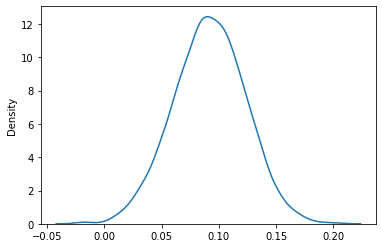

In [28]:
sns.kdeplot(model_team.beta_b_0)

<AxesSubplot:ylabel='Density'>

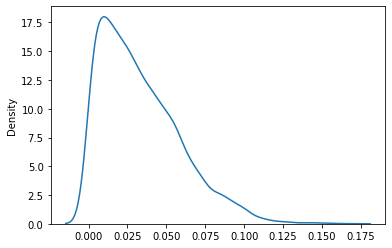

In [29]:
sns.kdeplot(model_team.sigma_a)

<AxesSubplot:ylabel='Density'>

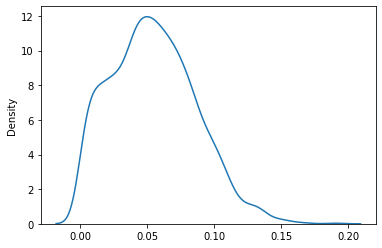

In [30]:
sns.kdeplot(model_team.sigma_b)

<AxesSubplot:ylabel='Density'>

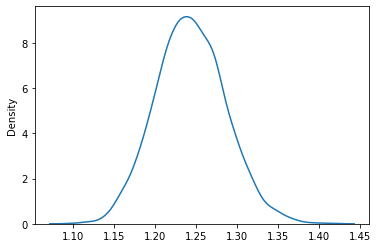

In [31]:
sns.kdeplot(model_team.gamma)

In [12]:
model_team.log_score()

-2.8662087989052387

In [13]:
team_h = "MCI"
team_a = "MUN"

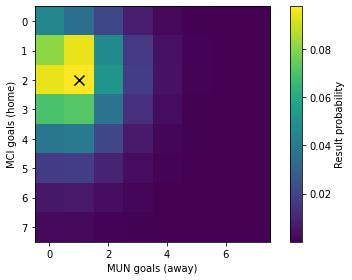

In [14]:
model_team.plot_score_probabilities(team_h, team_a);

In [15]:
model_team.concede_n_probability(2, team_h, team_a)

0.19040898612948995

In [16]:
model_team.score_n_probability(2, team_h, team_a)

0.2668034960685617

In [17]:
model_team.overall_probabilities(team_h, team_a)

(0.6319493696633706, 0.1626675815487128, 0.20538304593903958)

In [18]:
model_team.score_probability(team_h, team_a, 2, 2)

0.050800289452694825

(-1.0, 8.0)

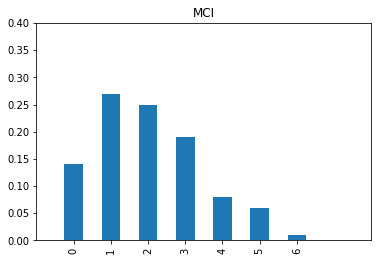

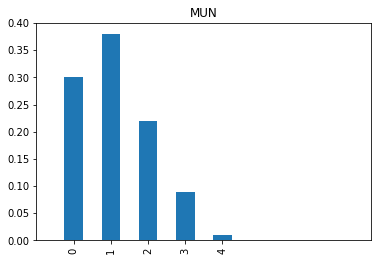

In [19]:
sim = model_team.simulate_match(team_h, team_a)
sim[team_h].value_counts(normalize=True).sort_index().plot.bar()
plt.title(team_h)
plt.ylim([0, 0.4])
plt.xlim([-1, 8])

plt.figure()
sim[team_a].value_counts(normalize=True).sort_index().plot.bar()
plt.title(team_a)
plt.ylim([0, 0.4])
plt.xlim([-1, 8])

MCI exp goals 2.2045828567041346
MUN exp goals 1.0397137935432637


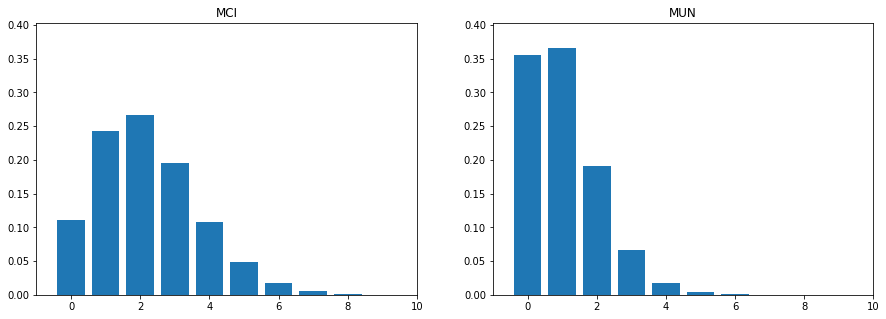

In [20]:
max_goals = 10

prob_score_h = [model_team.score_n_probability(n, team_h, team_a) for n in range(max_goals)]
print(team_h, "exp goals", sum([n*prob_score_h[n] for n in range(max_goals)])/sum(prob_score_h))

prob_score_a = [model_team.score_n_probability(n, team_a, team_h, home=False) for n in range(max_goals)]
print(team_a, "exp goals", sum([n*prob_score_a[n] for n in range(max_goals)])/sum(prob_score_a))

max_prob = 1.1*max(prob_score_h + prob_score_a)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(max_goals), prob_score_h)
plt.ylim([0, max_prob])
plt.xlim([-1, max_goals])
plt.title(team_h)

plt.subplot(1,2,2)
plt.bar(range(max_goals), prob_score_a)
plt.ylim([0, max_prob])
plt.xlim([-1, max_goals])
plt.title(team_a);

In [21]:
df = model_team.simulate_match(team_h, team_a)
print(df.quantile(0.25))
print(df.median())
print(df.quantile(0.75))

MCI    1.0
MUN    0.0
Name: 0.25, dtype: float64
MCI    2.0
MUN    1.0
dtype: float64
MCI    3.0
MUN    2.0
Name: 0.75, dtype: float64
